In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('nba_player_data.csv')

In [4]:
team_efficiency = df.groupby('TEAM')['EFF'].mean().reset_index()

In [5]:
# Sort teams by mean EFF
team_efficiency = team_efficiency.sort_values(by='EFF', ascending=False)

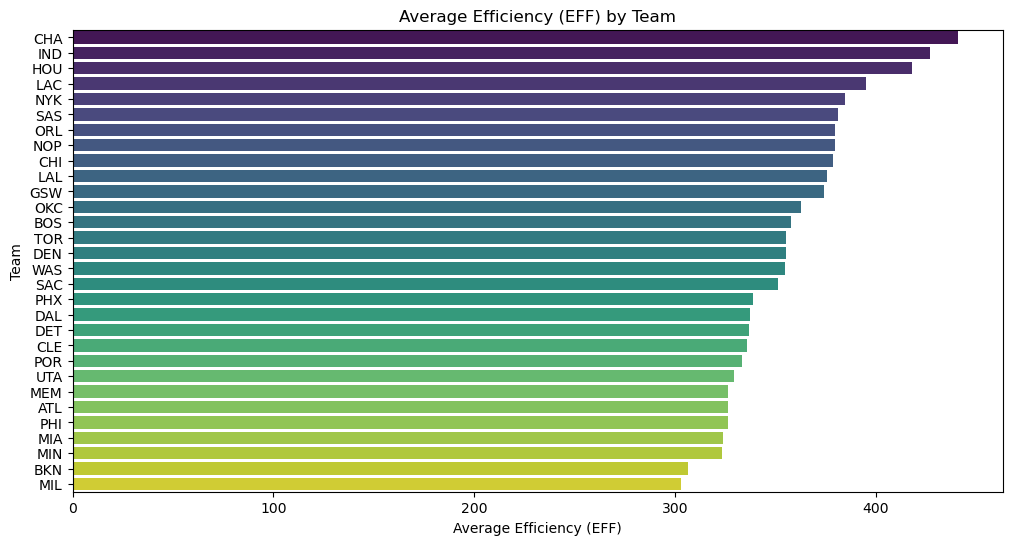

In [6]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='EFF', y='TEAM', data=team_efficiency, palette='viridis')
plt.title('Average Efficiency (EFF) by Team')
plt.xlabel('Average Efficiency (EFF)')
plt.ylabel('Team')

plt.savefig('team_efficiency_plot.png')

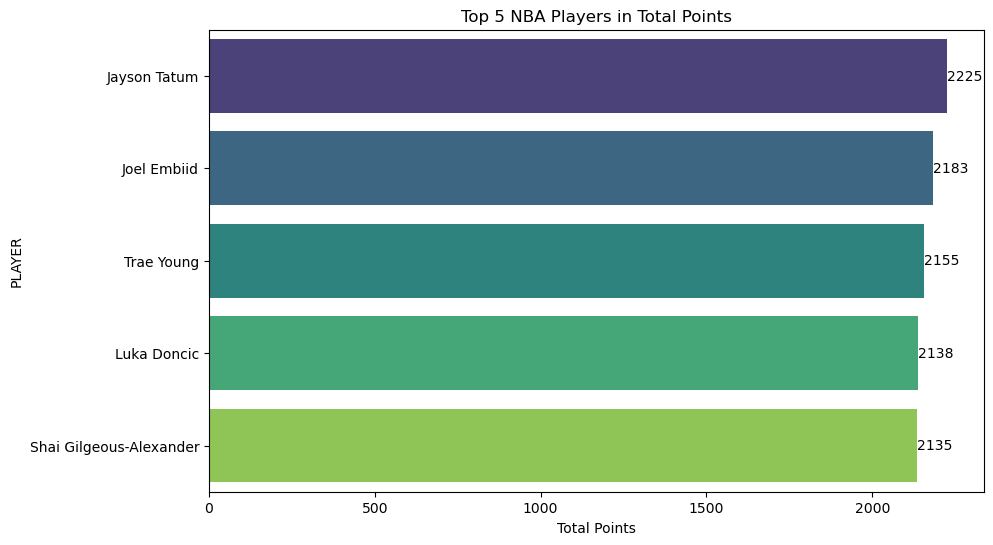

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by total points (PTS) in descending order
sorted_data = df.sort_values(by='PTS', ascending=False)

# Select the top 5 players
top_5_scorers = sorted_data.head(5)

# Create a bar plot for the top 5 players and their total points
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='PTS', y='PLAYER', data=top_5_scorers, palette='viridis')
plt.title('Top 5 NBA Players in Total Points')
plt.xlabel('Total Points')

# Display the actual numbers on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', color='black')

plt.show()


In [8]:
sorted_data = df.sort_values(by='PTS', ascending=False)

# Select the top scorer
top_scorer = sorted_data.iloc[0]['PLAYER']

# Find the player with the most accurate field goal percentage among the top scorers
most_accurate_fg_percentage_player = sorted_data.iloc[0]['PLAYER']
fg_percentage = sorted_data.iloc[0]['FG_PCT']

# Print the result
print(f"The player with the most accurate field goal percentage among the top scorers is: {most_accurate_fg_percentage_player}")
print(f"Their field goal percentage is: {fg_percentage:.2%}")

The player with the most accurate field goal percentage among the top scorers is: Jayson Tatum
Their field goal percentage is: 46.60%


In [9]:
import numpy as np

# Calculate steals-to-turnover ratio with handling division by zero
df['STL_TOV'] = np.where(df['TOV'] == 0, np.inf, df['STL'] / df['TOV'])

# Calculate blocks-to-turnover ratio with handling division by zero
df['BLK_TOV'] = np.where(df['TOV'] == 0, np.inf, df['BLK'] / df['TOV'])

# Drop rows with 'inf' values
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['STL_TOV', 'BLK_TOV'])

# Identify players with a high steals-to-turnover ratio
high_stl_tov_players = df.sort_values(by='STL_TOV', ascending=False).head(5)[['PLAYER', 'STL_TOV']]

# Identify players with a high blocks-to-turnover ratio
high_blk_tov_players = df.sort_values(by='BLK_TOV', ascending=False).head(5)[['PLAYER', 'BLK_TOV']]

# Print the results
print("Players with a High Steals-to-Turnover Ratio:")
print(high_stl_tov_players)

print("\nPlayers with a High Blocks-to-Turnover Ratio:")
print(high_blk_tov_players)

Players with a High Steals-to-Turnover Ratio:
                 PLAYER  STL_TOV
1826   Keita Bates-Diop      7.0
1273    John Butler Jr.      7.0
1836   Robert Covington      7.0
1450  Haywood Highsmith      5.0
739         Alex Caruso      5.0

Players with a High Blocks-to-Turnover Ratio:
                PLAYER  BLK_TOV
1826  Keita Bates-Diop     11.0
1273   John Butler Jr.      9.0
1881    Isaiah Jackson      5.0
722        Nic Claxton      4.5
1868     Nicolas Batum      4.0
